In [8]:
from jarvis.db.figshare import data
from jarvis.core.atoms import Atoms, ase_to_atoms, get_supercell_dims
from jarvis.core.atoms import crop_square
from jarvis.analysis.stem.convolution_apprx import STEMConv
import matplotlib.pyplot as plt

# Example of using STEMConv to simulate a surface image from a 3D DFT structure
dft_3d = data('dft_3d')
data = dft_3d[0]

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


In [9]:
data

{'jid': 'JVASP-90856',
 'spg_number': '129',
 'spg_symbol': 'P4/nmm',
 'formula': 'TiCuSiAs',
 'formation_energy_peratom': -0.42762,
 'func': 'OptB88vdW',
 'optb88vdw_bandgap': 0.0,
 'atoms': {'lattice_mat': [[3.566933224304235, 0.0, -0.0],
   [0.0, 3.566933224304235, -0.0],
   [-0.0, -0.0, 9.397075454186664]],
  'coords': [[2.6751975000000003, 2.6751975000000003, 7.376101754328542],
   [0.8917325, 0.8917325, 2.0209782456714573],
   [0.8917325, 2.6751975000000003, 4.69854],
   [2.6751975000000003, 0.8917325, 4.69854],
   [0.8917325, 2.6751975000000003, 0.0],
   [2.6751975000000003, 0.8917325, 0.0],
   [2.6751975000000003, 2.6751975000000003, 2.8894795605846353],
   [0.8917325, 0.8917325, 6.507600439415366]],
  'elements': ['Ti', 'Ti', 'Cu', 'Cu', 'Si', 'Si', 'As', 'As'],
  'abc': [3.56693, 3.56693, 9.39708],
  'angles': [90.0, 90.0, 90.0],
  'cartesian': True,
  'props': ['', '', '', '', '', '', '', '']},
 'slme': 'na',
 'magmom_oszicar': 0.0,
 'spillage': 'na',
 'elastic_tensor': 'na'

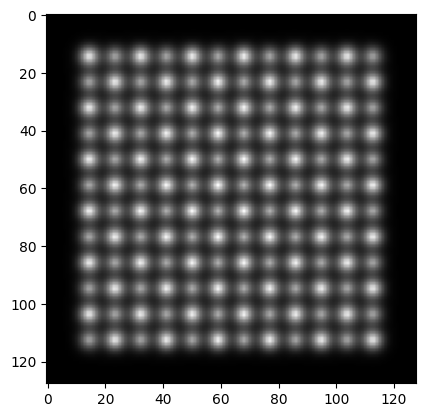

In [12]:
a = Atoms.from_dict(data["atoms"])
dims = get_supercell_dims(atoms=a, enforce_c_size=20)
s = a.make_supercell_matrix(dims)
c = crop_square(s, csize=20)
p = STEMConv(output_size=[128, 128]).simulate_surface(atoms=c)[0]
plt.imshow(p, cmap='gray')